<h1>Лабораторна робота №6<br>
Застосування numpy</h1>

<h5>Проскурня Анна ФБ-22</h5>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Завдання 1. Генерація прямої та шуму навколо неї

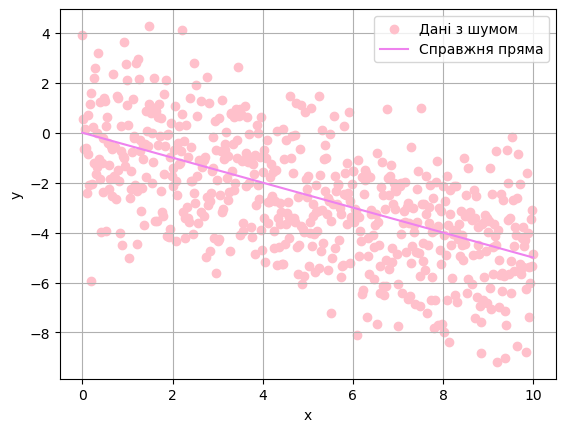

In [2]:
# Задані коефіцієнти прямої
k = -0.5
b = 0
N = 600
# Генеруємо значення xx
x = np.linspace(0, 10, N)

# Генеруємо значення yy з шумом навколо прямої y = k * x + b
noise = np.random.normal(0, 2, N)
y = k * x + b + noise

# Відображення даних
plt.scatter(x, y, label='Дані з шумом',color='pink')
plt.plot(x, k * x + b, color='violet', label='Справжня пряма')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Завдання 2. Знаходження коефіцієнтів методом найменших квадратів

Реалізація відбувається через обчислення за формулами:

$a=\frac{\sum_{i=1}^{n}(y)-b\sum_{i=1}^{n}(x)}{n}$

$b=\frac{n\sum_{i=1}^{n}(xy)-(\sum_{i=1}^{n}(x))(\sum_{i=1}^{n}(y))}{n\sum_{i=1}^{n}(x^2)-(\sum_{i=1}^{n}(x))^2}$

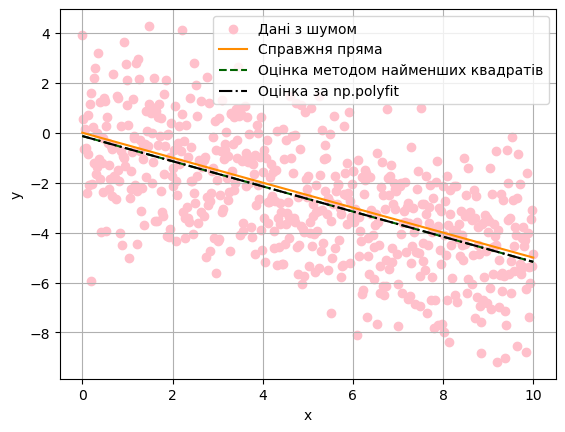

Параметри справжньої прямої:
k = -0.5
b = 0

Оцінки параметрів за методом найменших квадратів:
kk_hat = -0.5038354385472148
bb_hat = -0.13303224445095377

Оцінки параметрів за np.polyfit:
kk_np_polyfit = -0.5038354385472151
bb_np_polyfit = -0.1330322444509507


In [3]:
# Реалізація методу найменших квадратів
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    
    # Обчислюємо коефіцієнти прямої
    kk_hat = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    bb_hat = (sum_y - kk_hat * sum_x) / n
    
    return kk_hat, bb_hat

# Знайдення оцінок коефіцієнтів за методом найменших квадратів
kk_hat, bb_hat = least_squares_method(x, y)

# Знайдення оцінок коефіцієнтів за допомогою np.polyfit
coefficients = np.polyfit(x, y, 1)
kk_np_polyfit = coefficients[0]
bb_np_polyfit = coefficients[1]

# Відображення даних
plt.scatter(x, y, label='Дані з шумом',color='pink')
plt.plot(x, k * x + b, color='darkorange', label='Справжня пряма')
plt.plot(x, kk_hat * x + bb_hat, color='darkgreen', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(x, kk_np_polyfit * x + bb_np_polyfit, color='black', linestyle='-.', label='Оцінка за np.polyfit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Параметри справжньої прямої:")
print("k =", k)
print("b =", b)
print()
print("Оцінки параметрів за методом найменших квадратів:")
print("kk_hat =", kk_hat)
print("bb_hat =", bb_hat)
print()
print("Оцінки параметрів за np.polyfit:")
print("kk_np_polyfit =", kk_np_polyfit)
print("bb_np_polyfit =", bb_np_polyfit)


Завдання 3. Реалізація методу градієнтного спуску

<i>Градієнтний спуск (GD) — це ітеративний алгоритм оптимізації, який використовується для знаходження мінімального значення функції. Він ітеративно налаштовує параметри моделі, щоб мінімізувати функцію витрат.</i>
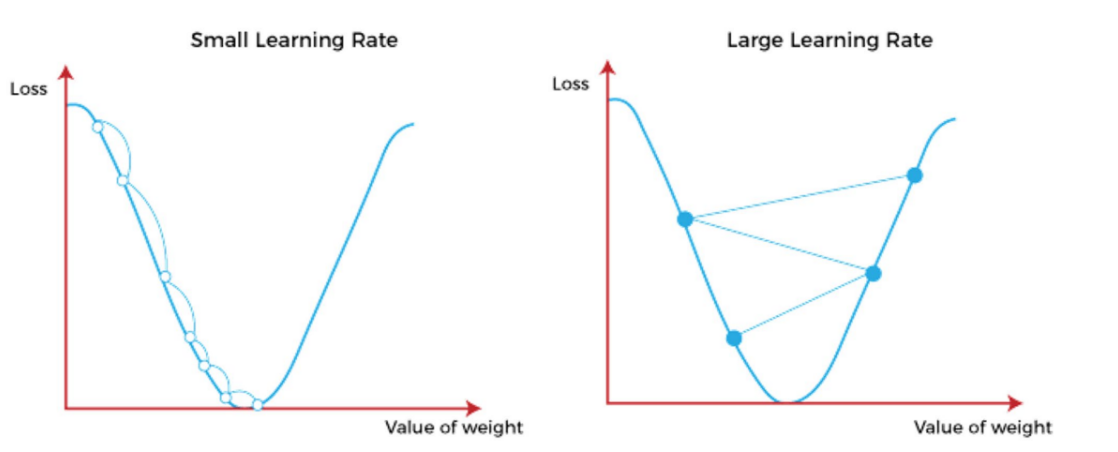

-0.5118354360074512 -0.08001021122725613


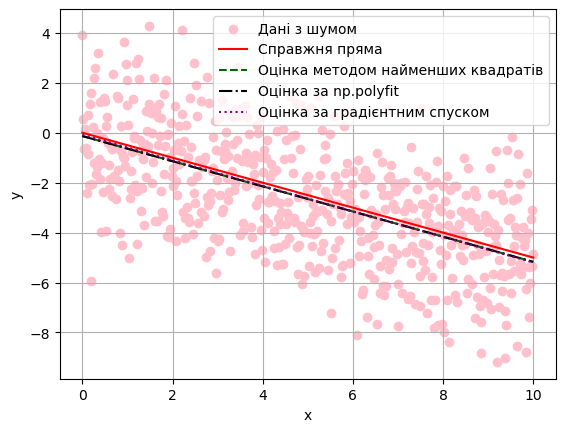

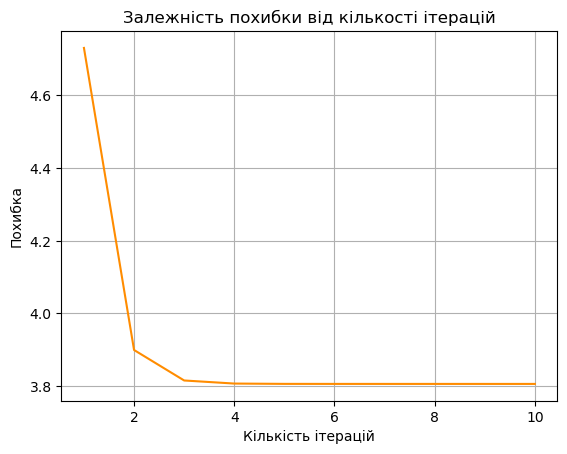

In [6]:
#ця функція реалізує алгоритм градієнтного спуску для простої лінійної регресії
def gradient_descent(x, y, learning_rate, n_iter):
    # Початкові оцінки коефіцієнтів
    kk_hat = 0
    bb_hat = 0
    n = len(x)
    
    # Перевірка на валідність параметрів
    if n_iter <= 0 or learning_rate <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    # Градієнтний спуск
    for _ in range(n_iter):
        # Обчислення градієнтів
        y_pred = kk_hat * x + bb_hat
        gradient_kk = (-2/n) * np.sum(x * (y - y_pred))
        gradient_bb = (-2/n) * np.sum(y - y_pred)

        # Оновлення параметрів
        kk_hat -= learning_rate * gradient_kk
        bb_hat -= learning_rate * gradient_bb
    
    return kk_hat, bb_hat

# Оптимальні параметри градієнтного спуску
learning_rate = 0.01
n_iter = 10

# Виклик функції градієнтного спуску
kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, n_iter)
print(kk_gradient, bb_gradient)

# Відображення знайдених оцінок лінії регресії разом з іншими
plt.scatter(x, y, label='Дані з шумом', color='pink')
plt.plot(x, k * x + b, color='red', label='Справжня пряма')
plt.plot(x, kk_hat * x + bb_hat, color='darkgreen', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(x, kk_np_polyfit * x + bb_np_polyfit, color='black', linestyle='-.', label='Оцінка за np.polyfit')
plt.plot(x, kk_gradient * x + bb_gradient, color='purple', linestyle=':', label='Оцінка за градієнтним спуском')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Функція втрат для градієнтного спуску
def loss_function(x, y, kk, bb):
    "обчислює середньоквадратичну помилку між прогнозованими значеннями y_pred та істинними значеннями y"
    y_pred = kk * x + bb
    return np.mean((y_pred - y) ** 2)

# Графік залежності похибки від кількості ітерацій
errors = []
iterations = range(1, n_iter + 1)

for i in iterations:

    kk_gradient, bb_gradient = gradient_descent(x, y, learning_rate, i)
    
    error = loss_function(x, y, kk_gradient, bb_gradient)
    errors.append(error)

plt.plot(iterations, errors, color='darkorange')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()
